# Essais de filtre anti-vieillissement de pellicule

### Import des librairies

In [33]:
import numpy as np
import skimage.io as skio
import matplotlib.pyplot as plt
import scipy.fftpack as sc
import skimage.filters as skf
from skimage import img_as_ubyte
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
import cv2

### Chargement de l'image

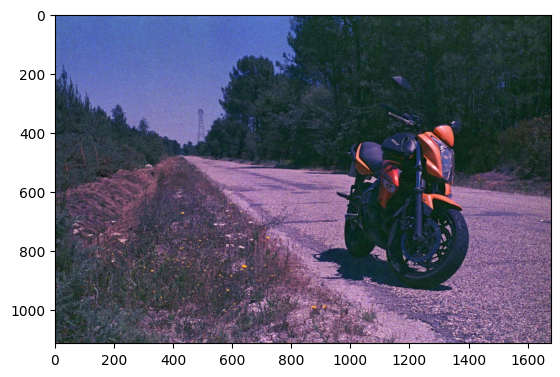

In [83]:
old_img = skio.imread("old_img.jpg")
plt.imshow(old_img)

### Filtre pour éliminer la teinte sépia

In [66]:
# créer une image blanche? 
# passer en float 
img = np.ones((old_img.shape[0], old_img.shape[1], 3)).astype(float)

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

# modifier les couleurs de l'image blanche pour obtenir le filtre 
newR = 0.393*R + 0.769*G + 0.189*B
newG = 0.349*R + 0.686*G + 0.168*B
newB = 0.272*R + 0.534*G + 0.131*B




In [67]:
sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])
scale = 0.001

# Apply sepia filter
sepia_img = img.dot(sepia_filter.T * scale)
# Rescale filter lines
sepia_img /= sepia_img.max()

# Return image formatted as a ubyte (values 0-256)
img = img_as_ubyte(sepia_img)

(1112, 1679, 3)


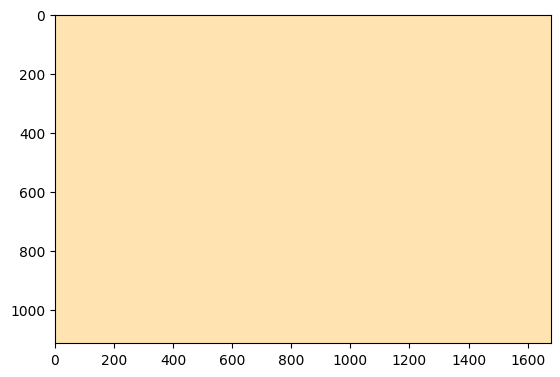

In [68]:
print(img.shape)
plt.imshow(img)
plt.show()

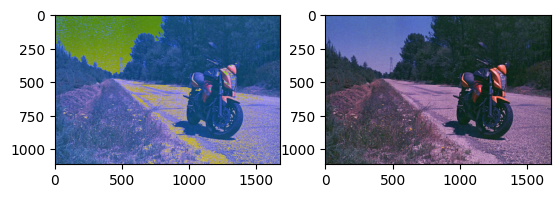

In [69]:
img = old_img - img 

plt.subplot(1,2, 1), plt.imshow(img)
plt.subplot(1, 2, 2), plt.imshow(old_img)
plt.show()

### Conclusion essai soustraction
Donne de mauvaises couleurs
--> Essayer de vieillir une image et faire la différence des deux images

## Essai à partir d'une image "neuve"

### Affichage des images

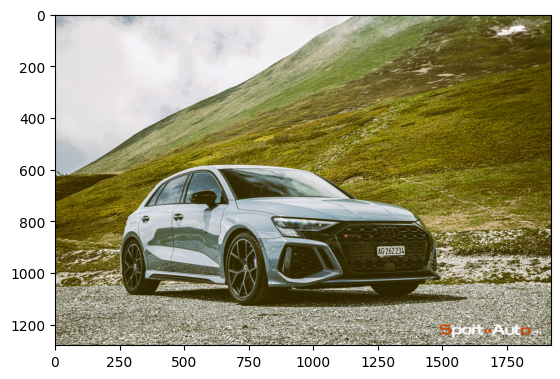

In [70]:
old_img = skio.imread("old_rs3.jpg")
plt.imshow(old_img)

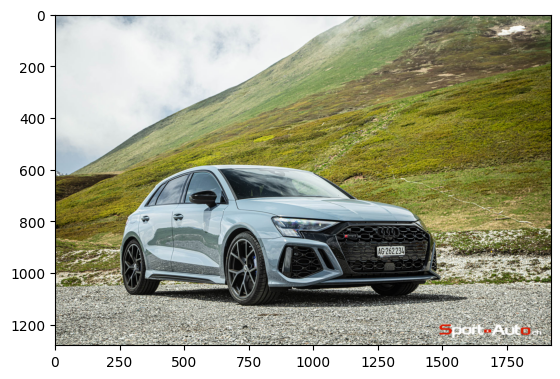

In [71]:
img = skio.imread("rs3.jpg")
plt.imshow(img)

### Mettre les images au format hsv 

In [73]:
img = rgb2hsv(img)
old_img = rgb2hsv(old_img)

### Calculer filtre sepia 

In [80]:
sepia_filter = old_img - img
print(sepia_filter)

[[[-2.61904762e-02 -4.40359693e-02 -3.52941176e-02]
  [-2.61904762e-02 -4.40359693e-02 -3.52941176e-02]
  [ 1.19047619e-02 -3.38934255e-02 -2.74509804e-02]
  ...
  [-3.37301587e-02  4.36877076e-01 -4.70588235e-02]
  [-3.37301587e-02  4.31556949e-01 -4.70588235e-02]
  [-3.37301587e-02  4.28442844e-01 -5.09803922e-02]]

 [[-2.61904762e-02 -4.41113260e-02 -3.92156863e-02]
  [-2.61904762e-02 -4.41113260e-02 -3.92156863e-02]
  [ 1.19047619e-02 -3.37025441e-02 -3.13725490e-02]
  ...
  [-4.68426501e-02  3.93742381e-01 -5.88235294e-02]
  [-4.68426501e-02  3.98403483e-01 -5.88235294e-02]
  [-4.68426501e-02  3.98403483e-01 -5.88235294e-02]]

 [[ 1.19047619e-02 -3.38649654e-02 -3.13725490e-02]
  [ 1.19047619e-02 -3.40578560e-02 -2.74509804e-02]
  [ 1.19047619e-02 -3.38934255e-02 -2.74509804e-02]
  ...
  [-4.18060201e-02  3.43828598e-01 -7.05882353e-02]
  [-3.82447665e-02  3.77865613e-01 -7.05882353e-02]
  [-3.82447665e-02  3.85046729e-01 -6.66666667e-02]]

 ...

 [[-8.71212121e-02  7.61689291e-03

### Application du filtre sur l'image originale

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


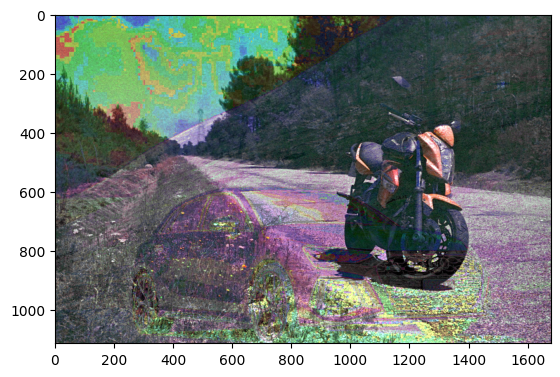

In [82]:
old_img2 = skio.imread("old_img.jpg")
old_img2 = rgb2hsv(old_img2)
sepia_filter = sepia_filter[0:old_img2.shape[0], 0:old_img2.shape[1], :] # reshape filter 
new_img = old_img2 - sepia_filter
new_img = hsv2rgb(new_img)
plt.imshow(new_img)

### Conclusion 2nde méthode 

On voit clairement l'image de base (voiture) dans le filtrage --> pas bon

## Histogramme des images
Calculons les histogrammes hsv des images pour voir l'influence du filtre sepia dessus

### Image blanche

In [87]:
img = np.ones((old_img.shape[0], old_img.shape[1], 3)).astype(float)
sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])
scale = 0.001

# Apply sepia filter
sepia_img = img.dot(sepia_filter.T * scale)
# Rescale filter lines
sepia_img /= sepia_img.max()

# Return image formatted as a ubyte (values 0-256)
sepia_img = img_as_ubyte(sepia_img)
img = img_as_ubyte(img)

In [2]:
def plot_hsv_hist(rgb_img):
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()
    return hist_h, hist_s, hist_v

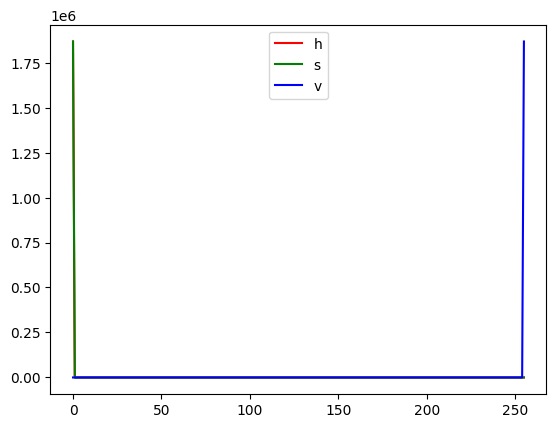

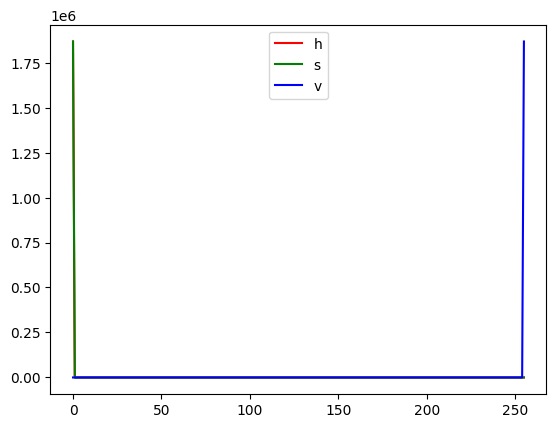

In [88]:
plot_hsv_hist(img)
plot_hsv_hist(sepia_img)

In [91]:
def plot_rgb_hist(img):
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    plt.show() 


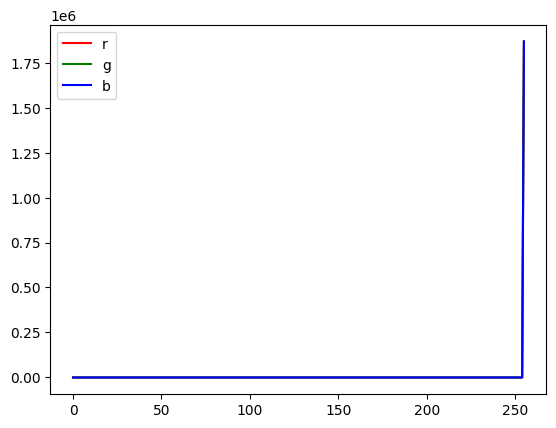

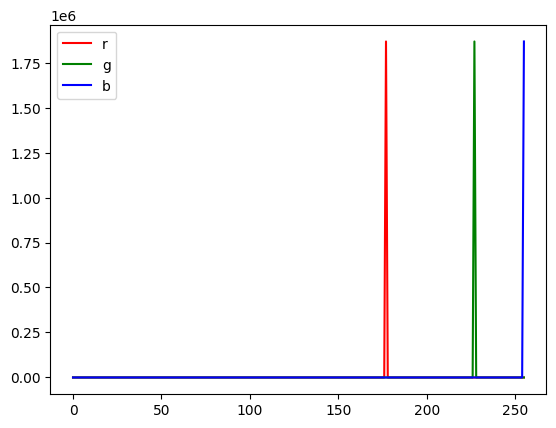

In [92]:
plot_rgb_hist(img)
plot_rgb_hist(sepia_img)

### Vraie image

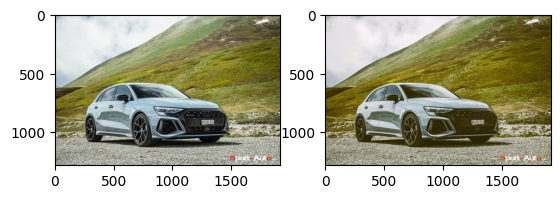

In [39]:
img = skio.imread("rs3.jpg")
old_img = skio.imread("old_rs3.jpg")
plt.subplot(1,2, 1), plt.imshow(img)
plt.subplot(1, 2, 2), plt.imshow(old_img)
plt.show()

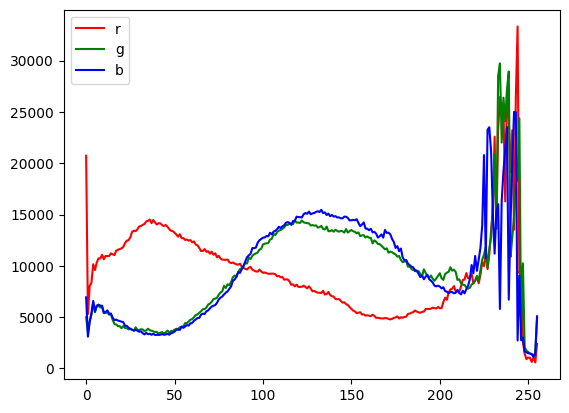

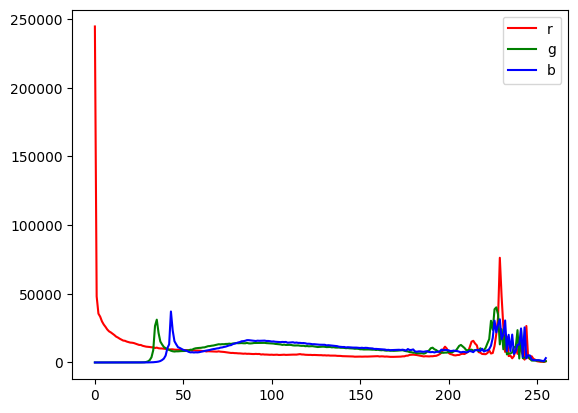

In [101]:
plot_rgb_hist(img)
plot_rgb_hist(old_img)

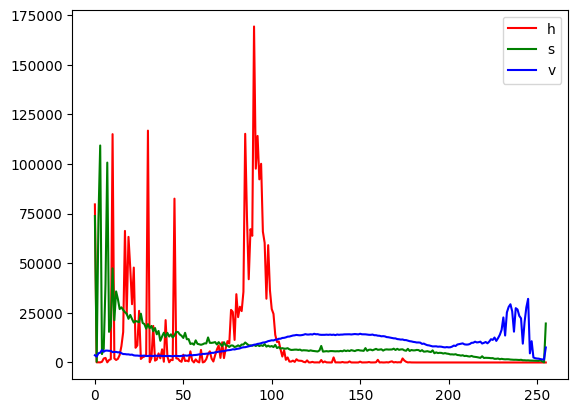

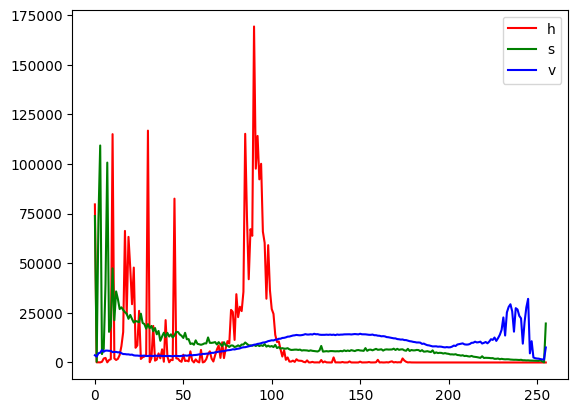

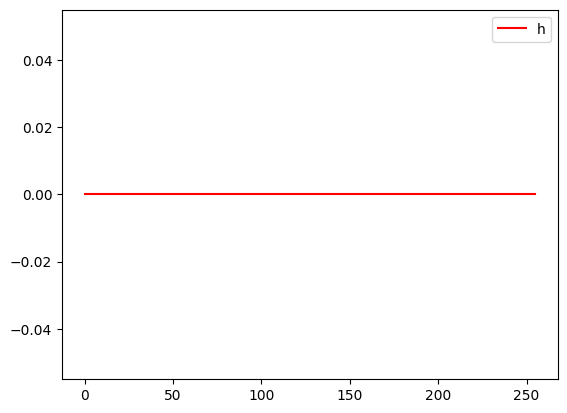

In [12]:
h1, s1, v1 = plot_hsv_hist(old_img)
h2, s2, v2 = plot_hsv_hist(img)
h = h1 - h2
s = s1 - s2
v = v1 - v2
plt.plot(h, color='r', label="h")
#plt.plot(s, color='g', label="s")
#plt.plot(v, color='b', label="v")
plt.legend()
plt.show()

In [13]:
# Image Fourier Transform
def fourier(image):
    TFI=sc.fft2(image)
    TFI=sc.fftshift(TFI) # mettre 0 au centre de l'image
    spectre=np.abs(TFI**2)
    return TFI,spectre

0.05931756734546731
3.6277201752712767


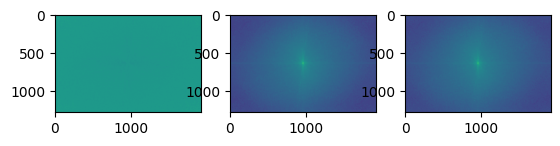

In [32]:
g_img = rgb2gray(img)
g_old_img = rgb2gray(old_img)
TFI1, spectre1 = fourier(g_img)
TFI2, spectre2 = fourier(g_old_img)
#plt.subplot(2,2,1), plt.imshow(TFI1)
spectre1 = np.log10(1+spectre1)
spectre2 = np.log10(1+spectre2)
spectre = spectre2 - spectre1
print(np.mean(spectre))
print(np.mean(spectre1))
plt.subplot(1,3,1),plt.imshow(spectre)
plt.subplot(1,3,2),plt.imshow(spectre1)
plt.subplot(1, 3, 3),plt.imshow(spectre2)
plt.show()

In [30]:
def apply_filter(filter, tfi_img):
    """Apply a filter to a Fourier transform of an image
    Parameters:
        filter: the filter to apply
        tfi_img: the Fourier transform of the image
    Returns:
        The filtered Fourier transform and its spectrum
"""
    fimage = np.multiply(tfi_img, filter)
    fspectre = np.abs(fimage**2)
    fimage = sc.fftshift(fimage)
    fimage = sc.ifft2(fimage)
    fimage = np.real(fimage)

    return fimage, fspectre

### Essai filtrage passe haut pour retirer les basses fréquences

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


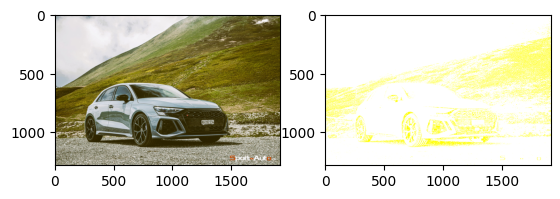

In [41]:
lp_img = skf.gaussian(old_img, sigma=10)
hp_img = old_img - lp_img
plt.subplot(1,2,1), plt.imshow(old_img)
plt.subplot(1,2,2), plt.imshow(hp_img)
plt.show()

Filtrer passe haut ne garde que la couleur que l'on veut enlever finalement (et pas de manière régulière).  

On va essayer de faire du machine learning. Peut être que cela marchera mieux. 